In [53]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [54]:
data=pd.read_csv('new_insurance_data.csv')
data.head()
#target column is 'charges'

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [55]:
data.shape

(1338, 13)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [57]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [58]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [59]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [60]:
col=list(data.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [61]:
data['smoker'].mode()

0    no
Name: smoker, dtype: object

In [62]:
data['smoker'].mode()[0]

'no'

In [63]:
data['children'].mean()

1.0907726931732933

In [64]:
data['age'].mean()

39.31000752445448

In case of null values there are 2 datatypes and methods to treat them

Numerical-int/float-replace null values with with mean/median

Categorial-object/string-replace null values with with mode


For numeric:

Median->Center

Mean->Average

In [65]:
for col_name in col:
    if data[col_name].dtypes == 'object':
        data[col_name]=data[col_name].fillna(data[col_name].mode()[0])
    else:
        data[col_name]=data[col_name].fillna(data[col_name].mean())

In [66]:
data.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

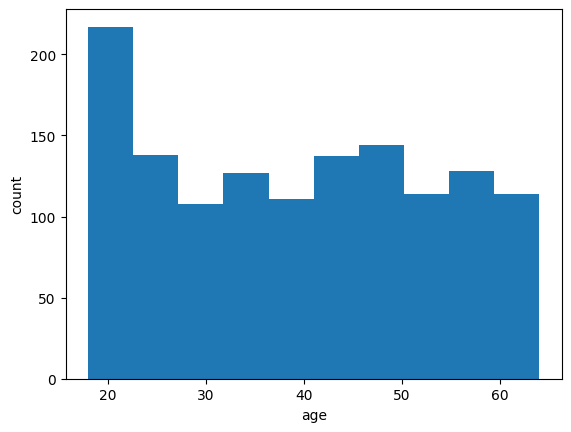

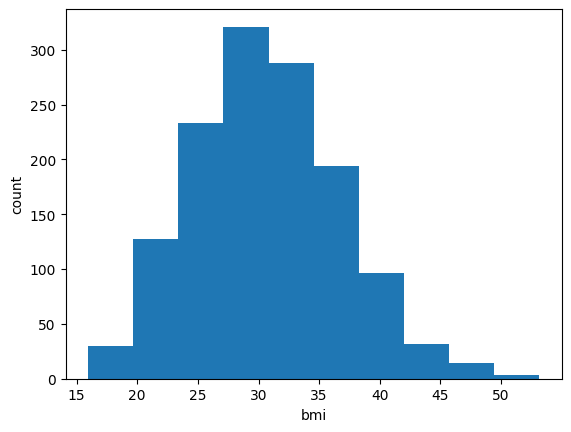

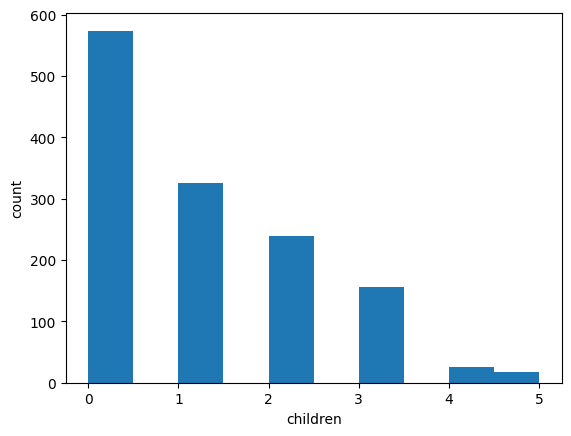

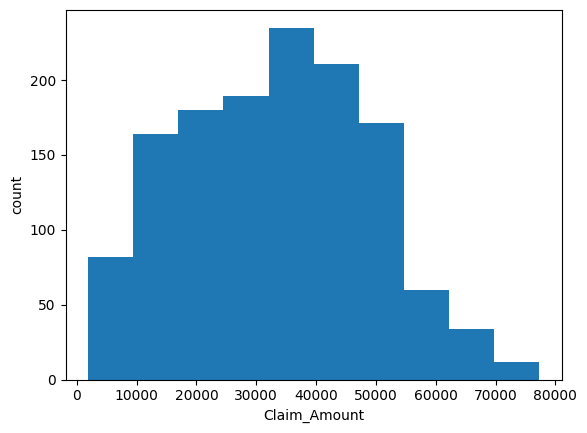

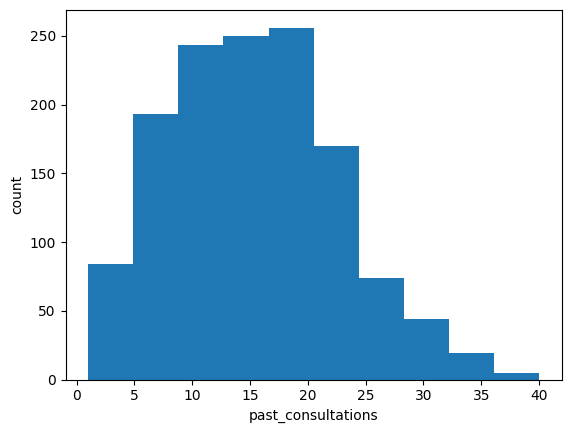

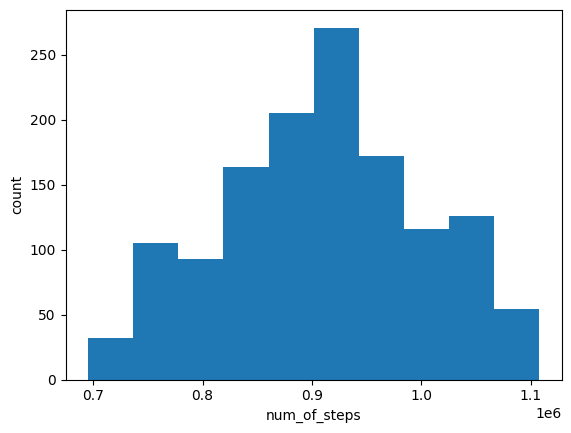

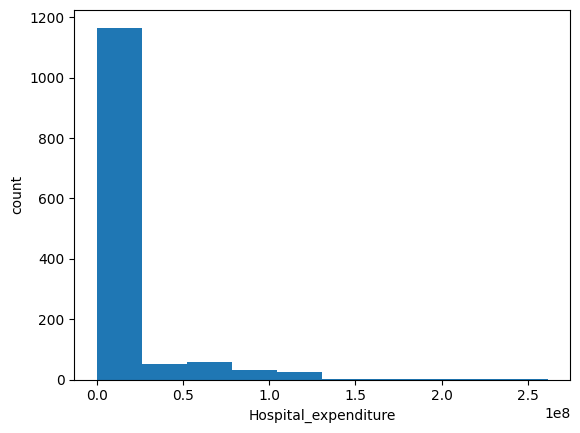

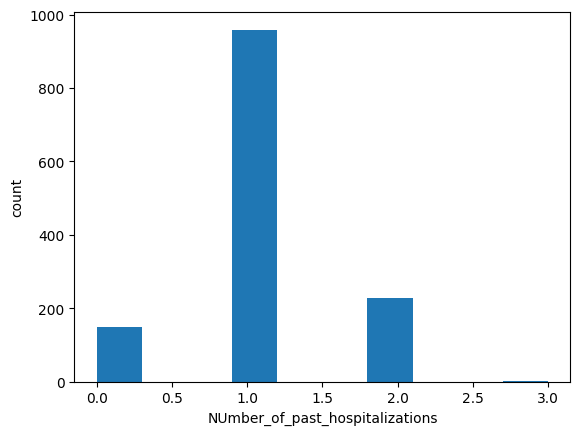

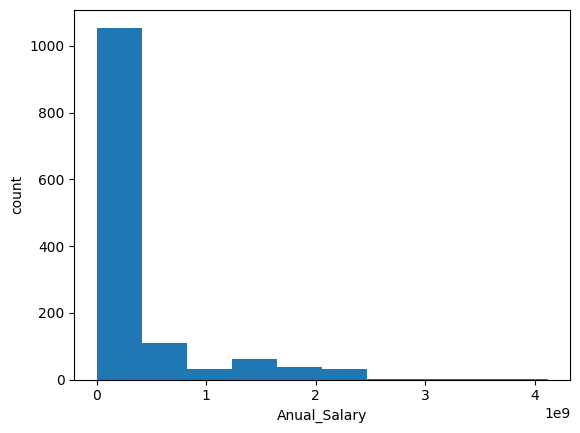

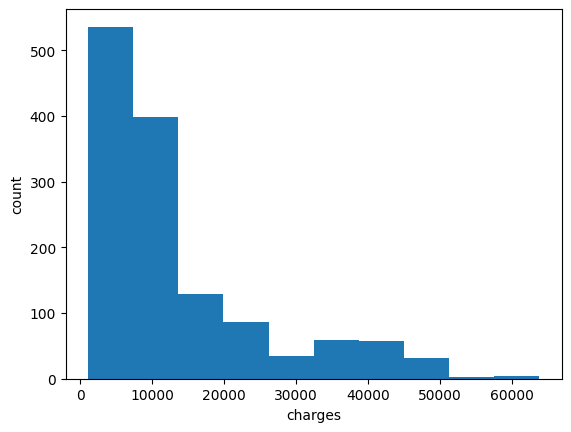

In [67]:
for colname in col:
    if data[colname].dtypes=='int64' or data[colname].dtypes=='float64':
        plt.hist(data[colname])
        plt.xlabel(colname)
        plt.ylabel('count')
        plt.show()

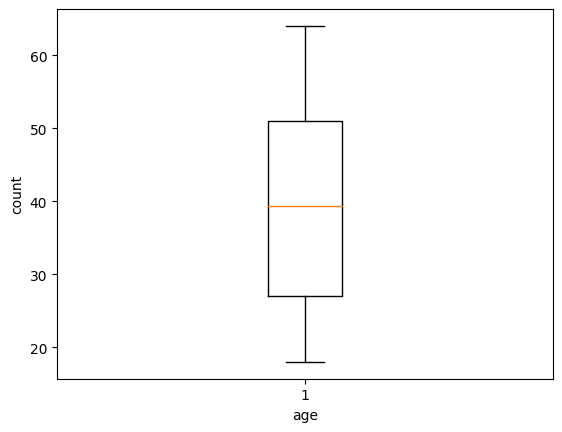

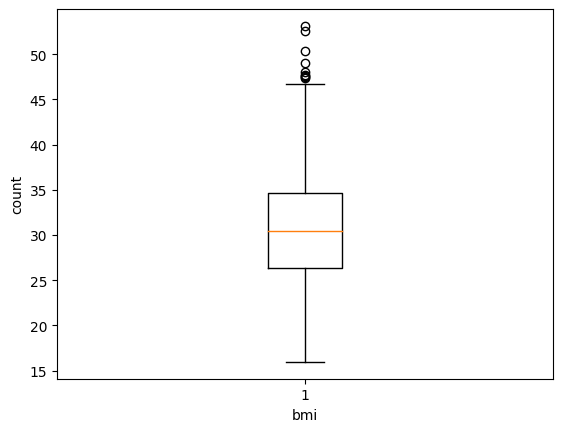

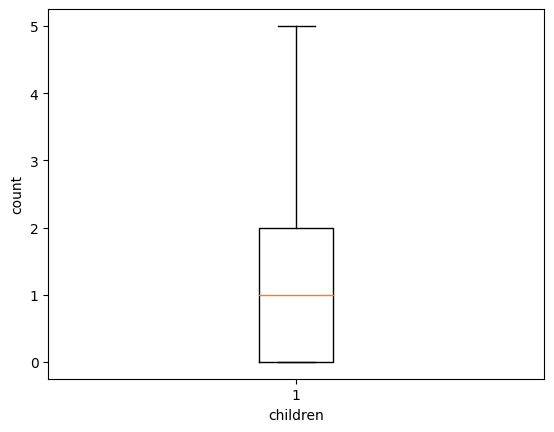

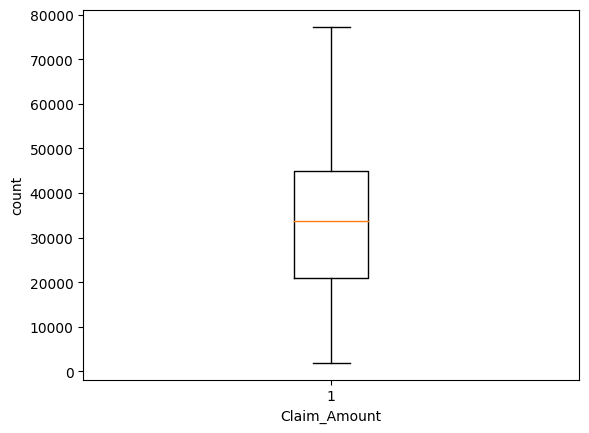

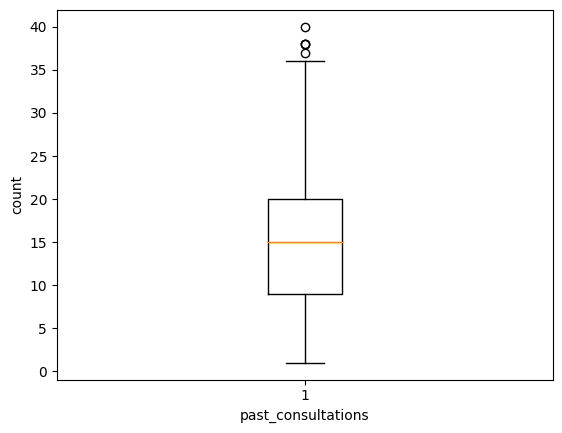

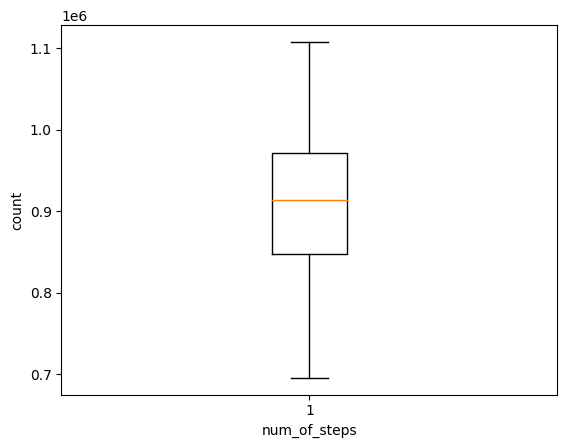

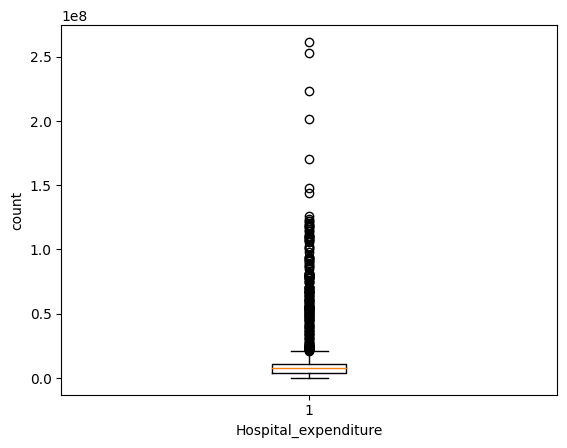

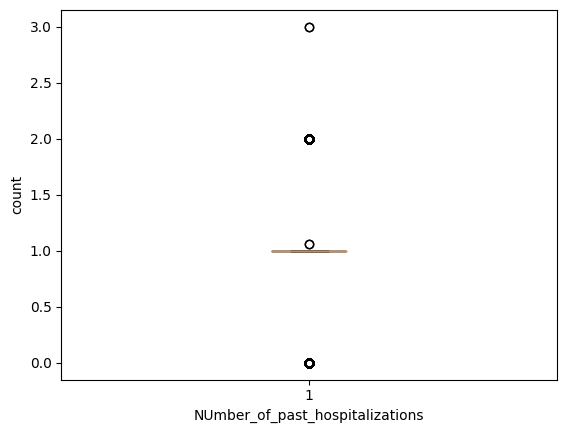

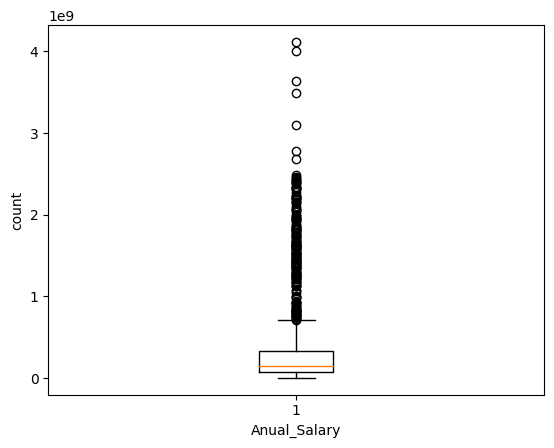

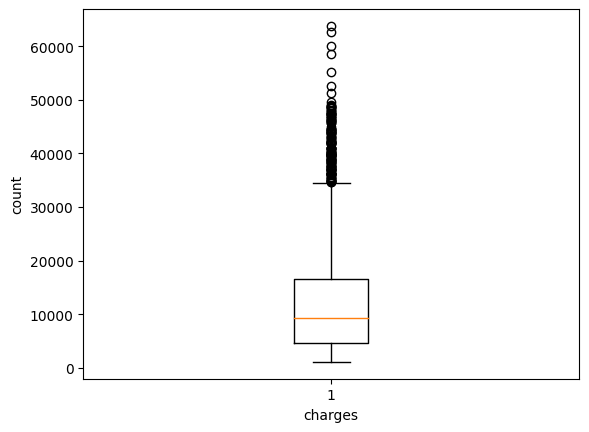

In [68]:
for colname in col:
    if data[colname].dtypes=='int64' or data[colname].dtypes=='float64':
        plt.boxplot(data[colname])
        plt.xlabel(colname)
        plt.ylabel('count')
        plt.show()

Treating the outliers

Upper fence = q3 + 1.5*IQR

Lower fence = q1 - 1.5*IQR

In [69]:
Q1=data.bmi.quantile(0.25)
Q3=data.bmi.quantile(0.75)
print('Q1=',Q1,'\nQ3=',Q3)
IQR=Q3-Q1
print('IQR=',IQR)

Q1= 26.315 
Q3= 34.65625
IQR= 8.341249999999999


In [70]:
LF=Q1-1.5*IQR
LF

13.803125000000003

In [71]:
UF=Q3+1.5*IQR
UF

47.168124999999996

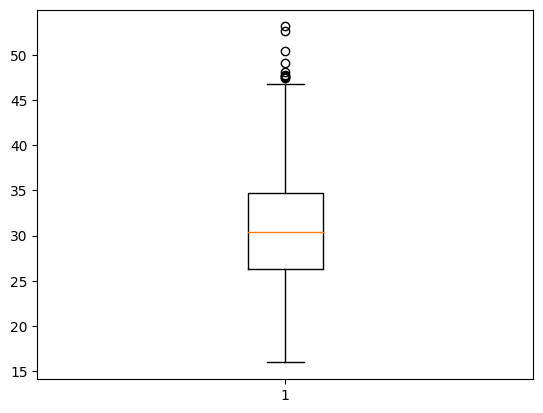

In [72]:
plt.boxplot(data['bmi'])
plt.show()

In [73]:
Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.bmi >= Q1 - 1.5*IQR) & (data.bmi <= Q3 + 1.5*IQR)]

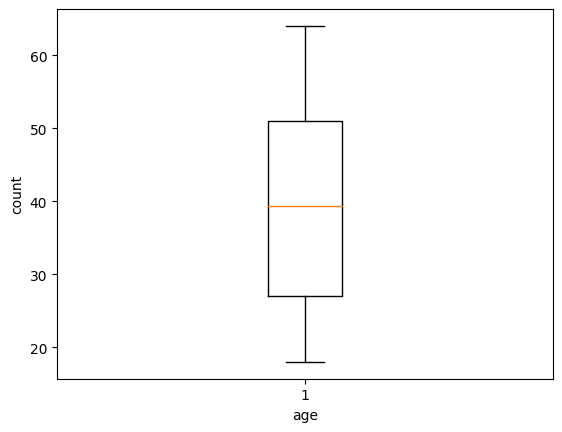

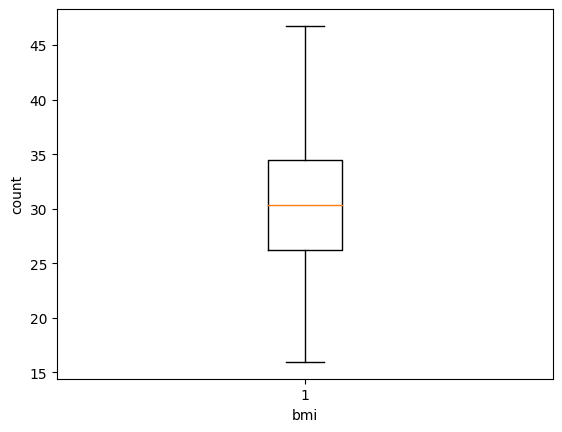

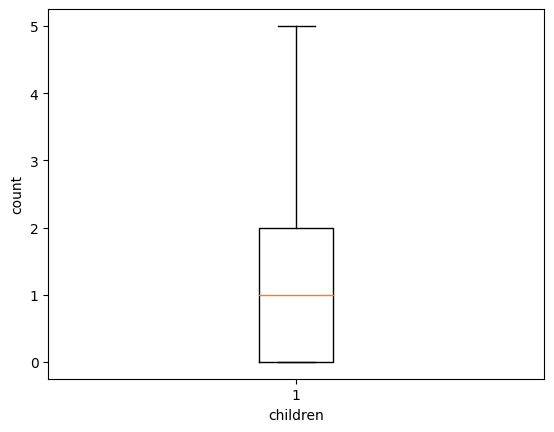

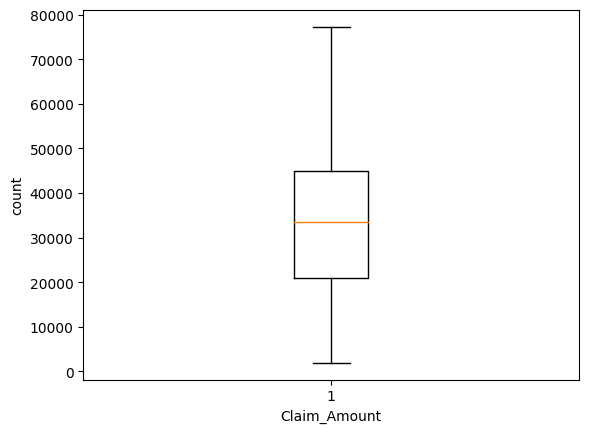

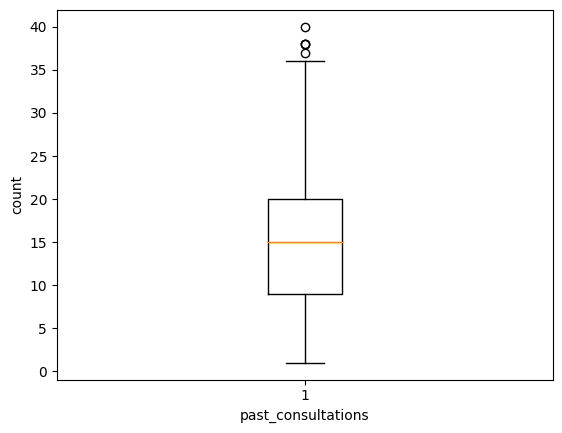

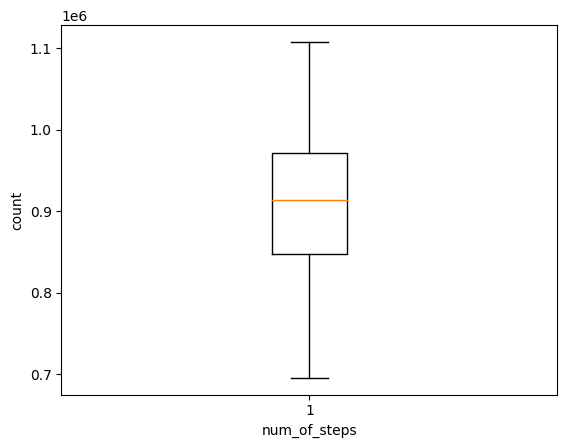

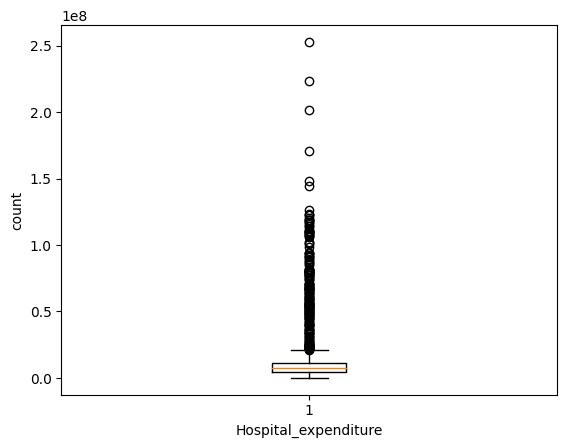

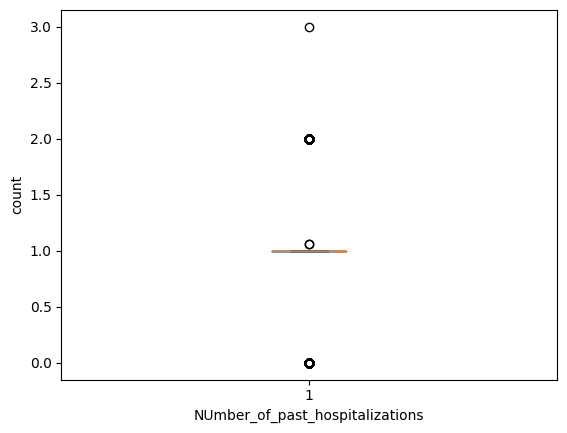

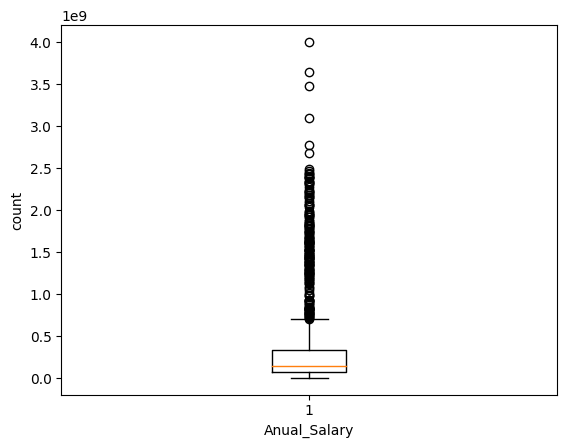

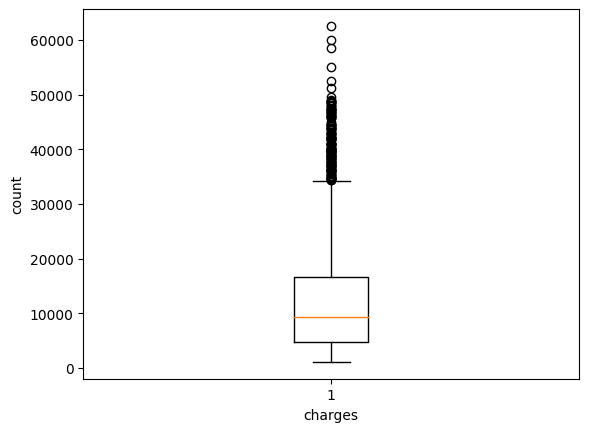

In [74]:
for colname in col:
    if data[colname].dtypes=='int64' or data[colname].dtypes=='float64':
        plt.boxplot(data[colname])
        plt.xlabel(colname)
        plt.ylabel('count')
        plt.show()

In [75]:
Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.bmi >= Q1 - 1.5*IQR) & (data.bmi <= Q3 + 1.5*IQR)]

Q1 = data.past_consultations.quantile(0.25)
Q3 = data.past_consultations.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.past_consultations >= Q1 - 1.5*IQR) & (data.past_consultations <= Q3 + 1.5*IQR)]

Q1 = data.Hospital_expenditure.quantile(0.25)
Q3 = data.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Hospital_expenditure >= Q1 - 1.5*IQR) & (data.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = data.Anual_Salary.quantile(0.25)
Q3 = data.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Anual_Salary >= Q1 - 1.5*IQR) & (data.Anual_Salary <= Q3 + 1.5*IQR)]

In [76]:
data.shape

(1030, 13)

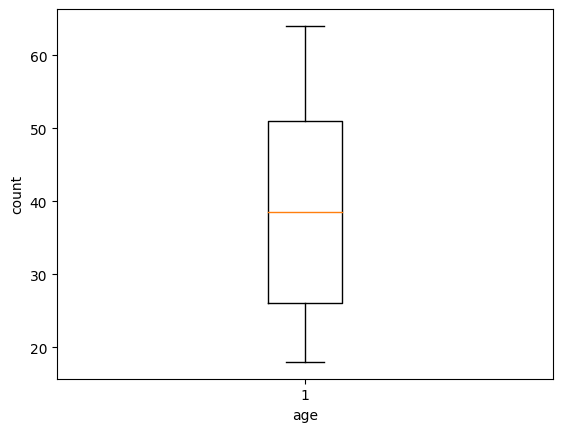

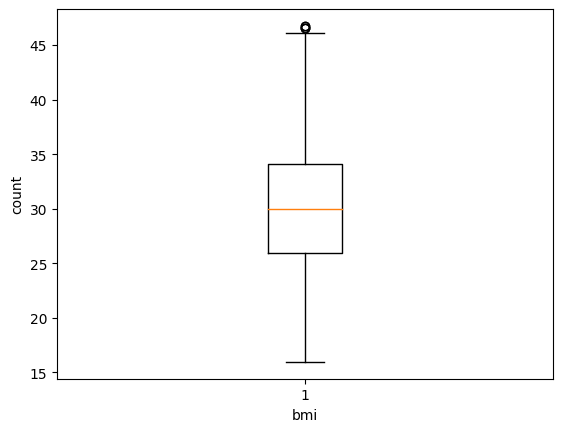

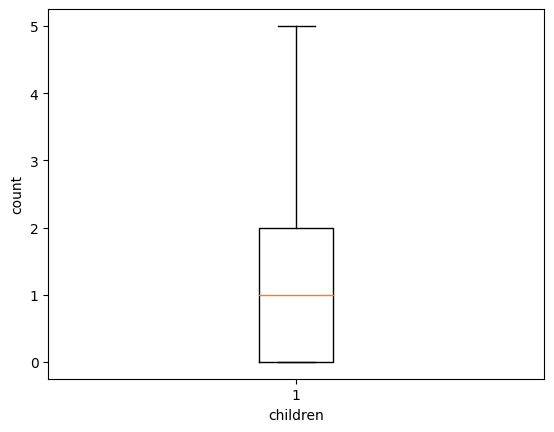

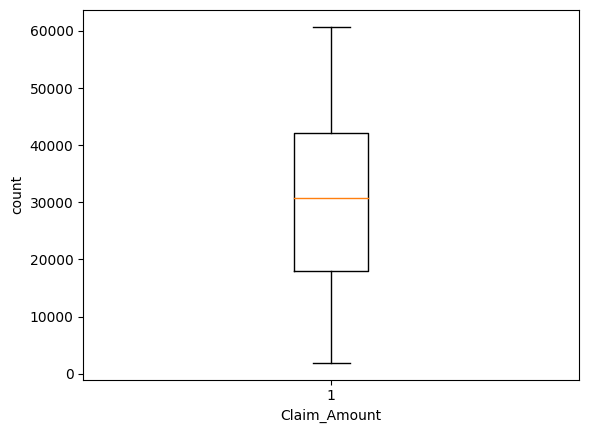

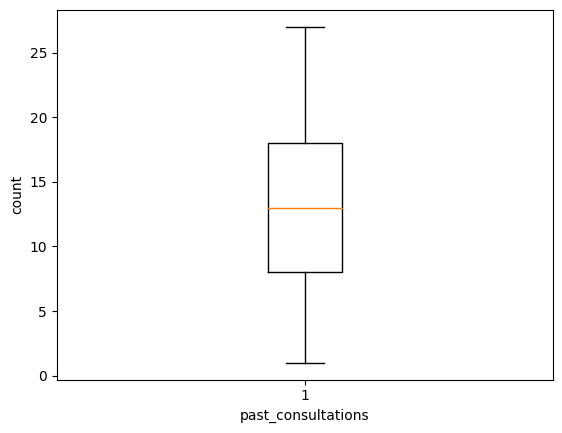

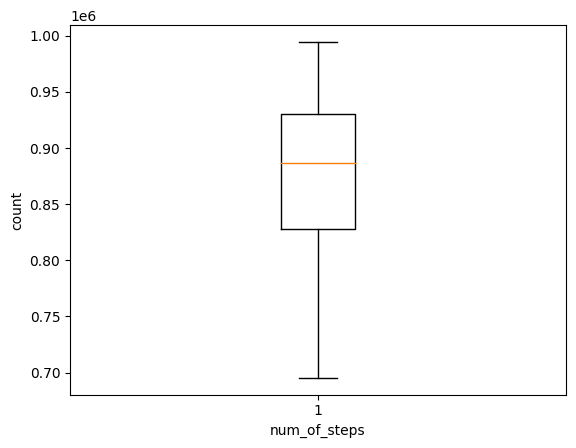

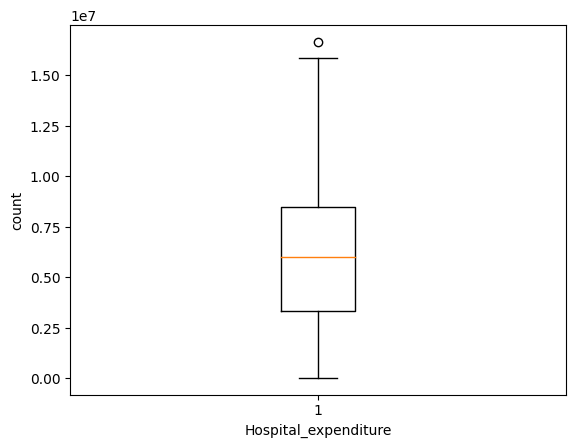

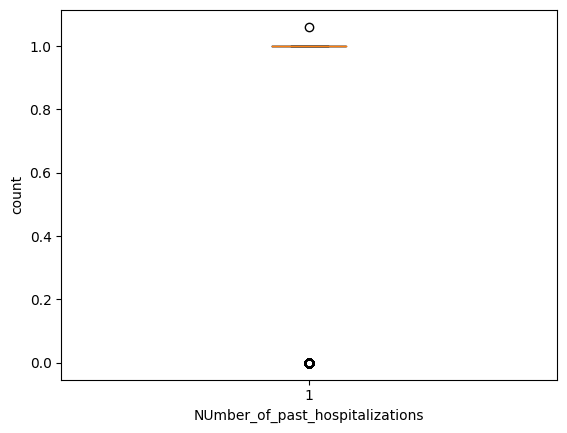

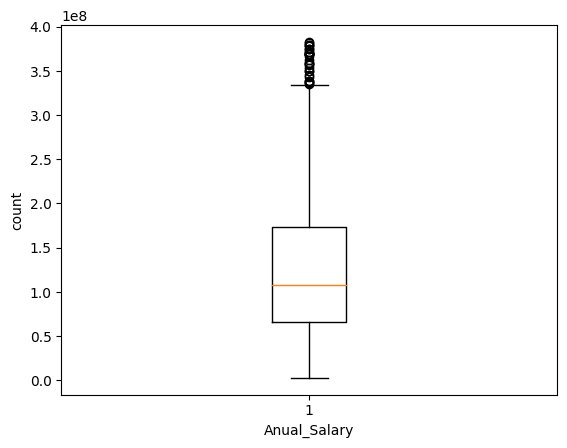

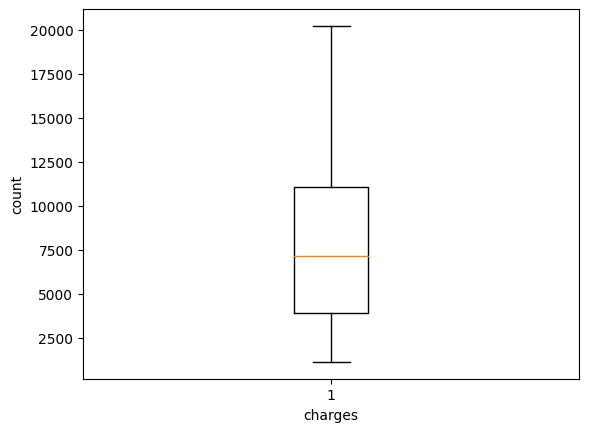

In [77]:
for colname in col:
    if data[colname].dtypes=='int64' or data[colname].dtypes=='float64':
        plt.boxplot(data[colname])
        plt.xlabel(colname)
        plt.ylabel('count')
        plt.show()

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = [] # here we are taking all columns other than obj type columns and the dep column
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [81]:
data=data.drop(['num_of_steps'],axis=1)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = [] # here we are taking all columns other than obj type columns and the dep column
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [84]:
data=data.drop(['age'],axis=1)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = [] # here we are taking all columns other than obj type columns and the dep column
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [86]:
data=data.drop(['bmi'],axis=1)
data=data.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = [] # here we are taking all columns other than obj type columns and the dep column
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [90]:
x=data.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=data.loc[:,['charges']]
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [91]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
#random state selects same data again and again

In [93]:
l_model=LinearRegression()      #building the model
l_model.fit(xtrain,ytrain)      #training the model

LinearRegression()

In [95]:
ytest

,charges
752,10704.47000
723,10197.77220
177,2801.25880
834,11848.14100
718,10107.22060
...,...
627,8688.85885
993,16085.12750
426,5976.83110
895,12925.88600


In [94]:
predictions = l_model.predict(xtest)
predictions

array([[ 7410.79368291],
       [10525.46032916],
       [ 4225.68186835],
       [11784.67064226],
       [ 9710.4476994 ],
       [ 2920.28422478],
       [ 7675.02920952],
       [ 3974.05235591],
       [ 1998.9072971 ],
       [ 1644.33779822],
       [ 9355.99422157],
       [ 6212.23827285],
       [ 7039.69058407],
       [ 6913.4106462 ],
       [ 7297.05052728],
       [ 8116.21854336],
       [ 5359.21098612],
       [11610.94654975],
       [10731.85265307],
       [ 4125.98535047],
       [ 4978.27582416],
       [ 7076.11959566],
       [ 5297.22536169],
       [10517.54532015],
       [ 7970.3230254 ],
       [ 9134.27913298],
       [ 3195.07752334],
       [ 2030.84851755],
       [ 7974.53183189],
       [ 6784.2193549 ],
       [ 9063.13892275],
       [ 9603.83277347],
       [ 7310.54589069],
       [ 3127.0522965 ],
       [10815.26325585],
       [ 6390.86195986],
       [ 2959.61224856],
       [ 5861.07915274],
       [ 8191.7821509 ],
       [ 3550.84253838],


In [103]:
error_pred=pd.DataFrame(columns=['Actual_data','Predicted_data'])
error_pred

,Actual_data,Predicted_data


In [104]:
error_pred['Actual_data']=ytest     #original answer key with the examiner
error_pred

,Actual_data,Predicted_data
752,10704.47000,NaN
723,10197.77220,NaN
177,2801.25880,NaN
834,11848.14100,NaN
718,10107.22060,NaN
...,...,...
627,8688.85885,NaN
993,16085.12750,NaN
426,5976.83110,NaN
895,12925.88600,NaN


In [105]:
error_pred['Predicted_data']=predictions     #original answer key with the examiner
error_pred

,Actual_data,Predicted_data
752,10704.47000,7410.793683
723,10197.77220,10525.460329
177,2801.25880,4225.681868
834,11848.14100,11784.670642
718,10107.22060,9710.447699
...,...,...
627,8688.85885,5781.937583
993,16085.12750,14969.262737
426,5976.83110,4926.602197
895,12925.88600,11617.127211


In [106]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Predicted_data']
error_pred

,Actual_data,Predicted_data,Error
752,10704.47000,7410.793683,3293.676317
723,10197.77220,10525.460329,-327.688129
177,2801.25880,4225.681868,-1424.423068
834,11848.14100,11784.670642,63.470358
718,10107.22060,9710.447699,396.772901
...,...,...,...
627,8688.85885,5781.937583,2906.921267
993,16085.12750,14969.262737,1115.864763
426,5976.83110,4926.602197,1050.228903
895,12925.88600,11617.127211,1308.758789


In [107]:
from sklearn.metrics import *

In [108]:
r2_on_test=r2_score(ytest,predictions)
r2_on_test      #84% accuracy of this model

0.8436003409637491